# Analiza odczytów z czujników IMU

Wstępne opracowanie danych, które udało się odczyta z telefonu wyposazonego w IMU. 

## Aplikacja mobilna
Dla potrzeb projektu została opracowana aplikacja mobilna "imugrabber" w języku Kotlin.

![Screenshot](screenshot.jpg)

## Dane
Dane to pliki CSV zawierające 50 wierszy po 9 wartości `float64` kazda. Wartości te pochodzą z akcelerometru, magnetometru i zyroskopu.
Zestaw danych to 250 plików, po 50 plików dla kazdej z klas:
- CIRCLES_RIGHT - obrót zgodnie z ruchem wskazówek zegara
- CIRCLES_LEFT - obrót przeciwnie z ruchem wskazówek zegara
- FORWARD_BACK - ruch "przód - tył"
- SQUARE - ruch rysujący kwadrat w płaszczyźnie pionowej 
- TRIANGLE - ruch rysujący trójkąt w płaszczyźnie pionowej

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/CIRCLES_RIGHT/paojcdvhqn.csv', sep=';')
df = df.iloc[:, :-1]
df

,gyro_x,gyro_y,gyro_z,magnetometer_x,magnetometer_y,magnetometer_z,accelerometer_x,accelerometer_y,accelerometer_z
0,-0.056963,-0.680962,0.627435,-10.860000,-6.660000,-39.180000,2.375048,-0.155623,9.440637
1,0.627206,-0.494648,0.827799,-11.460000,-6.300000,-39.120000,2.518700,-0.153229,11.008839
2,0.374308,-0.070097,1.087417,-13.860000,-5.760000,-39.660000,1.546654,0.241814,10.613795
3,1.211193,-1.173320,1.328097,-15.540000,-6.900000,-39.059998,-1.587356,0.567426,15.136742
4,3.123201,-0.627817,2.189417,-17.520000,-13.139999,-38.160000,1.077391,-0.064643,16.305113
5,3.423747,-0.770759,2.364125,-21.720000,-19.320000,-36.300000,1.941698,1.027113,15.914857
6,4.212374,0.839482,2.234621,-24.300000,-23.880000,-32.399998,5.988198,2.279280,16.285960
7,4.996725,1.260368,1.405677,-27.480000,-29.099998,-26.939999,8.834904,4.400543,12.926594
8,4.831791,1.006859,0.725173,-28.140000,-31.019999,-22.619999,11.066299,5.741595,12.730269
9,5.344918,1.091769,-0.037797,-28.859999,-32.579998,-15.120000,13.101371,6.208464,9.296985


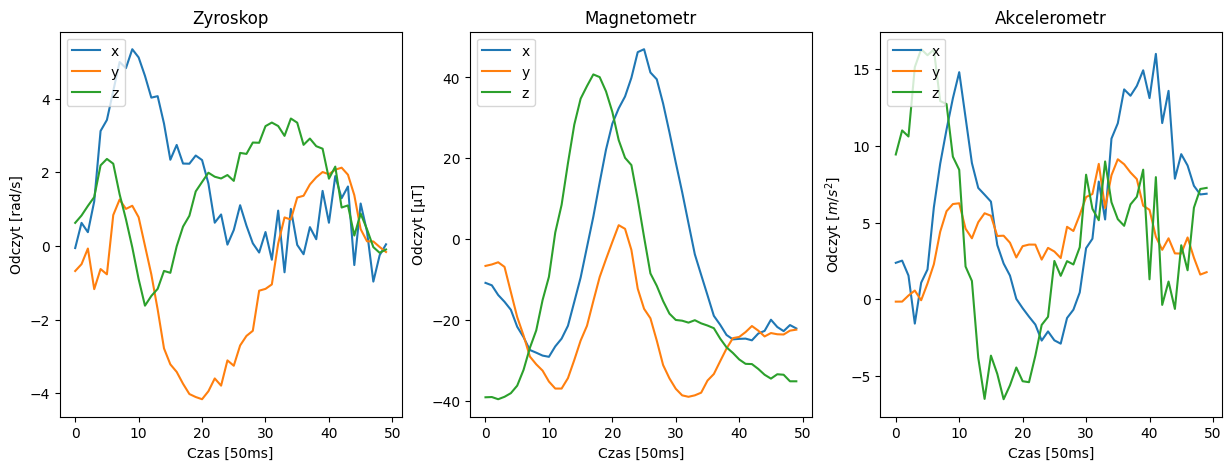

In [22]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)

ax[0].plot(df.iloc[:, 0], label='x')
ax[0].plot(df.iloc[:, 1], label='y')
ax[0].plot(df.iloc[:, 2], label='z')
ax[0].set_title('Zyroskop')
ax[0].set_xlabel('Czas [50ms]')
ax[0].set_ylabel('Odczyt [rad/s]')
ax[0].legend(loc="upper left")
ax[1].plot(df.iloc[:, 3], label='x')
ax[1].plot(df.iloc[:, 4], label='y')
ax[1].plot(df.iloc[:, 5], label='z')
ax[1].set_title('Magnetometr')
ax[1].set_xlabel('Czas [50ms]')
ax[1].set_ylabel('Odczyt [μT]')
ax[1].legend(loc="upper left")
ax[2].plot(df.iloc[:, 6], label='x')
ax[2].plot(df.iloc[:, 7], label='y')
ax[2].plot(df.iloc[:, 8], label='z')
ax[2].set_title('Akcelerometr')
ax[2].set_xlabel('Czas [50ms]')
ax[2].set_ylabel('Odczyt [$m/s^2$]')
ax[2].legend(loc="upper left")
plt.show()